<img src='https://www.actris.eu/sites/default/files/inline-images/Actris%20logo.png' width=200 align=right>

# ACTRIS DC 
## Climatology

The climatology of a variable, for example VARIABLE, is the variable’s condition averaged over a period of time. Climatologies can be computed based on different terms. For example we can compute climatological averages, which are the mean of monthly values of a climate variable over a specified period of time. The period will vary depending on the availability of data, but is typically in the range of 2-20 years. Climatological normals are monthly averages computed for a prolonged period of at least 30 consecutive years. The current default climatological standard normal is the average of the period from 01 January 1981 to 31 December 2010.

In [1]:
# Importing useful python libraries
import xarray as xr 
import threddsclient
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import datetime

In [2]:
# Get the EBAS thredds catalog
all_opendap_urls = threddsclient.opendap_urls('https://thredds.nilu.no/thredds/catalog/ebas/catalog.html')

In [3]:
opendap_urls = [x for x in all_opendap_urls if 'chemiluminescence_photolytic' in x]
opendap_urls = [x for x in opendap_urls if 'FI0050R' in x]
opendap_urls

['https://thredds.nilu.no/thredds/dodsC/ebas/FI0050R.20220712000000.20230424080751.chemiluminescence_photolytic..air.8d.1h.FI03L_DMT_BLC_Thermo_42iTL_SMR.FI03L_Mastgas_IMP_2022.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/FI0050R.20180101000000.20230424080751.chemiluminescence_photolytic..air.5y.1h.FI03L_DMT_BLC_Thermo_42iTL_SMR.FI03L_Mastgas.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/FI0050R.20160101000000.20200225100616.chemiluminescence_photolytic..air.2y.1h.FI03L_Thermo_42iTL_DMT_BLC_SMR_air.FI03L_Mastgas.lev2.nc']

In [4]:
ds = xr.open_dataset(opendap_urls[1])
ds

<xarray.Dataset>
Dimensions:                                                (time: 43824,
                                                            tbnds: 2,
                                                            metadata_time: 5,
                                                            NOx_ug_N_per_m3_stddev_qc_flags: 1,
                                                            nitrogen_dioxide_nmol_per_mol_prec1587_qc_flags: 1,
                                                            nitrogen_monoxide_ug_N_per_m3_ExpUnc2s_qc_flags: 1,
                                                            ...
                                                            NOx_ug_N_per_m3_perc8413_qc_flags: 1,
                                                            nitrogen_dioxide_ug_N_per_m3_stddev_qc_flags: 1,
                                                            NOx_ug_N_per_m3_prec1587_qc_flags: 1,
                                                            nitrogen_monoxide_ug_N_per_m3_precision_qc_flags: 1,
                                                            NOx_nmol_per_mol_ExpUnc2s_qc_flags: 1,
                                                            nitrogen_dioxide_nmol_per_mol_amean_qc_flags: 1)
Coordinates:
  * time                                                   (time) datetime64[ns] ...
  * metadata_time                                          (metadata_time) datetime64[ns] ...
Dimensions without coordinates: tbnds, NOx_ug_N_per_m3_stddev_qc_flags,
                                nitrogen_dioxide_nmol_per_mol_prec1587_qc_flags,
                                nitrogen_monoxide_ug_N_per_m3_ExpUnc2s_qc_flags,
                                nitrogen_monoxide_nmol_per_mol_precision_qc_flags,
                                nitrogen_dioxide_ug_N_per_m3_prec1587_qc_flags,
                                nitrogen_dioxide_nmol_per_mol_precision_qc_flags,
                                ...
                                NOx_ug_N_per_m3_perc8413_qc_flags,
                                nitrogen_dioxide_ug_N_per_m3_stddev_qc_flags,
                                NOx_ug_N_per_m3_prec1587_qc_flags,
                                nitrogen_monoxide_ug_N_per_m3_precision_qc_flags,
                                NOx_nmol_per_mol_ExpUnc2s_qc_flags,
                                nitrogen_dioxide_nmol_per_mol_amean_qc_flags
Data variables: (12/110)
    time_bnds                                              (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                                     (metadata_time, tbnds) datetime64[ns] ...
    nitrogen_dioxide_nmol_per_mol_stddev_ebasmetadata      (metadata_time) |S64 ...
    nitrogen_dioxide_ug_N_per_m3_perc8413                  (time) float64 ...
    NOx_ug_N_per_m3_ExpUnc2s                               (time) float64 ...
    NOx_ug_N_per_m3_stddev_qc                              (NOx_ug_N_per_m3_stddev_qc_flags, time) float64 ...
    ...                                                     ...
    NOx_nmol_per_mol_ExpUnc2s_qc                           (NOx_nmol_per_mol_ExpUnc2s_qc_flags, time) float64 ...
    nitrogen_monoxide_ug_N_per_m3_precision_ebasmetadata   (metadata_time) |S64 ...
    nitrogen_dioxide_nmol_per_mol_amean_qc                 (nitrogen_dioxide_nmol_per_mol_amean_qc_flags, time) float64 ...
    NOx_ug_N_per_m3_prec1587                               (time) float64 ...
    NOx_ug_N_per_m3_prec1587_ebasmetadata                  (metadata_time) |S64 ...
    nitrogen_dioxide_ug_N_per_m3_precision_ebasmetadata    (metadata_time) |S64 ...
Attributes: (12/107)
    Conventions:                        CF-1.8, ACDD-1.3
    featureType:                        timeSeries
    title:                              Ground based in situ observations of ...
    keywords:                           mass_concentration_of_nitrogen_dioxid...
    id:                                 FI0050R.20180101000000.20230424080751...
    naming_authority:            

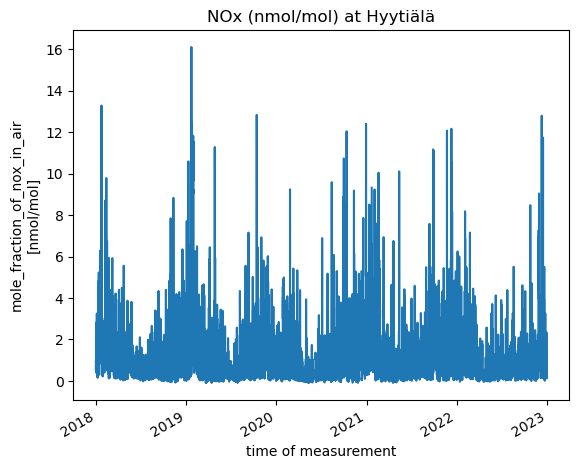

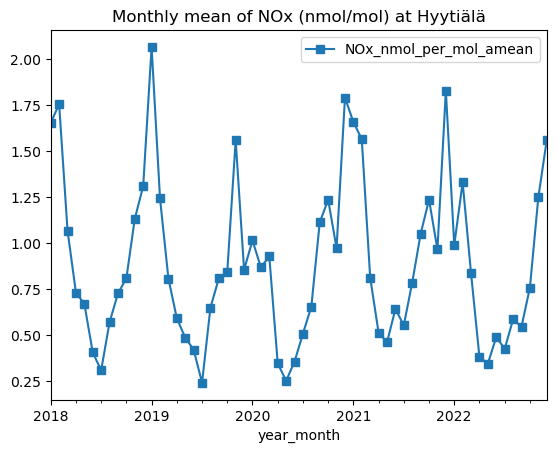

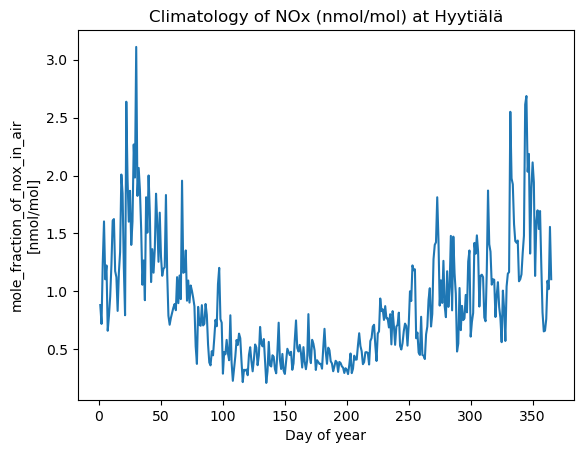

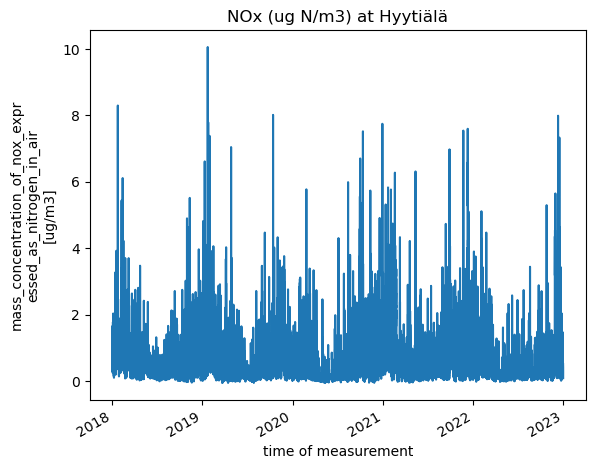

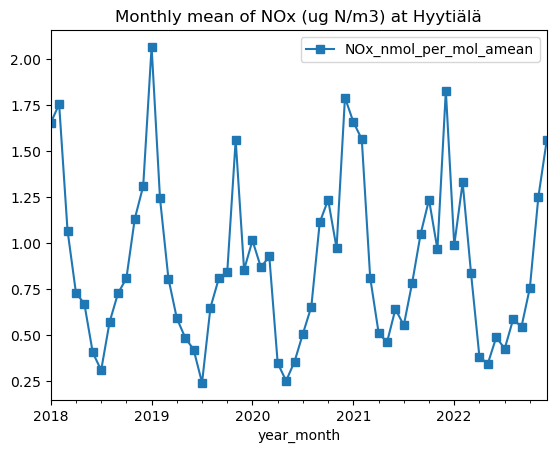

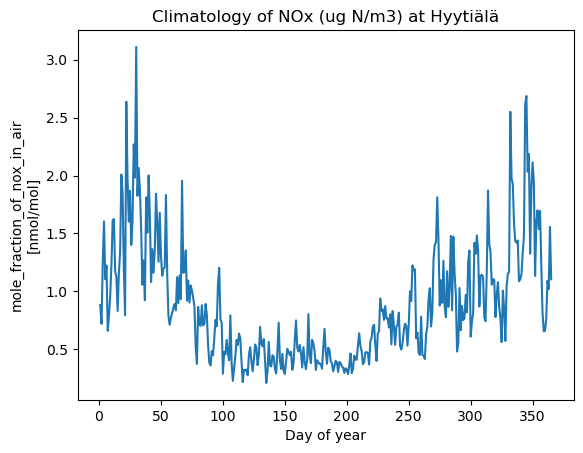

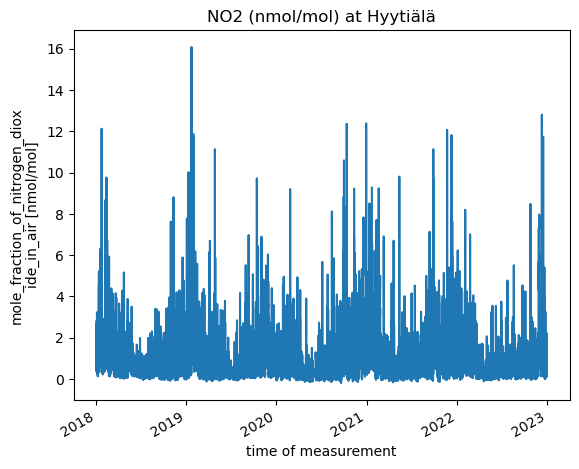

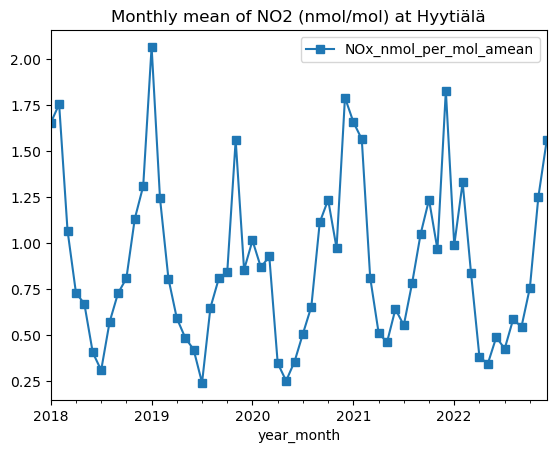

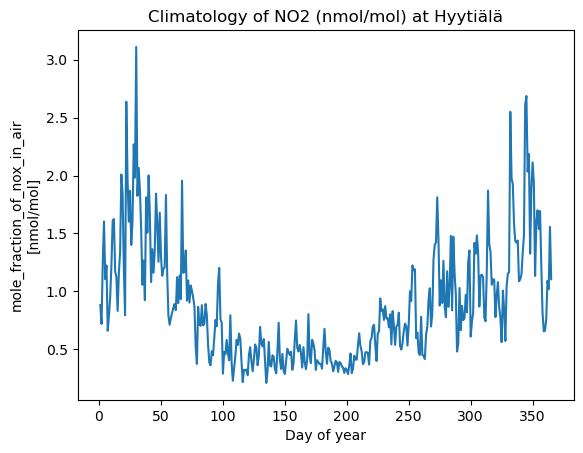

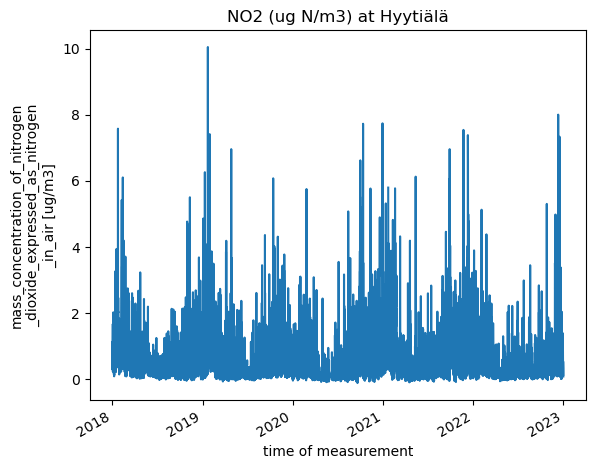

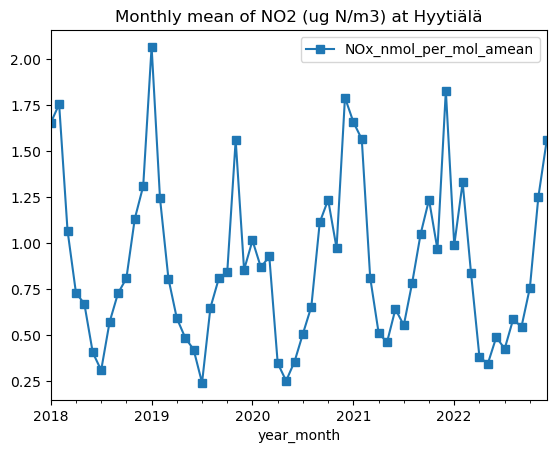

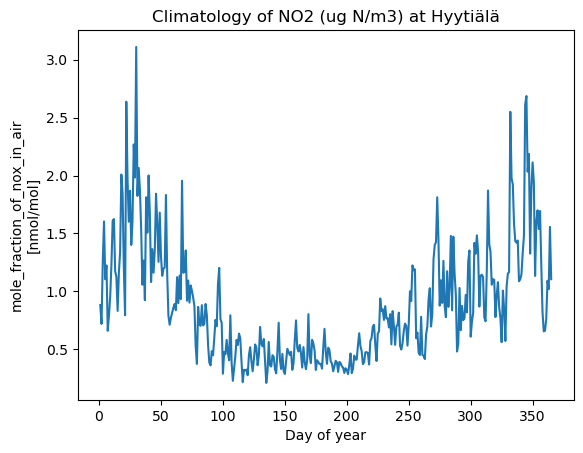

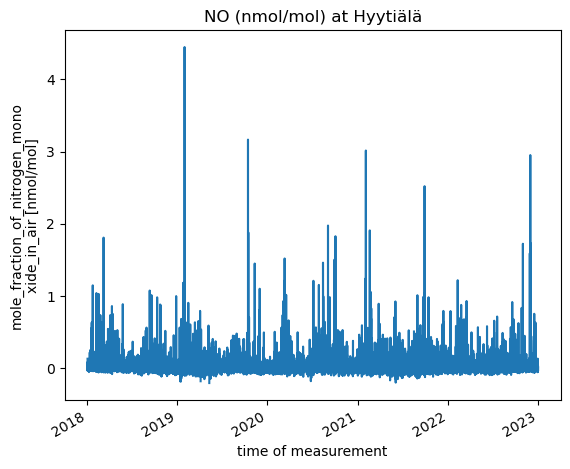

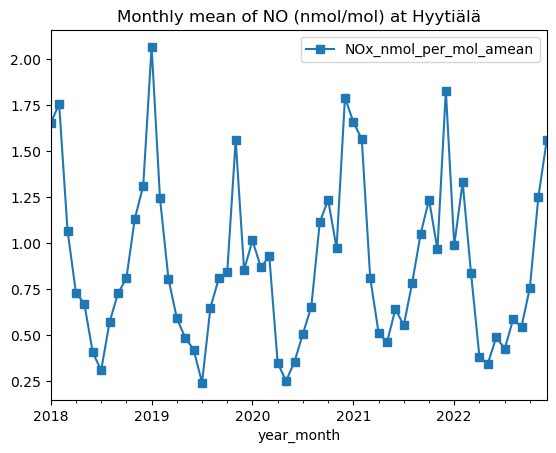

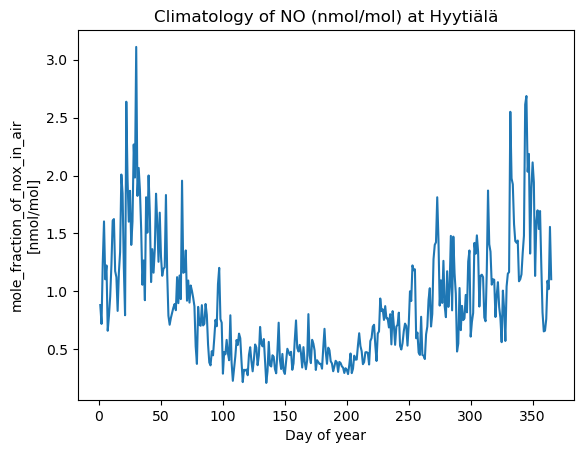

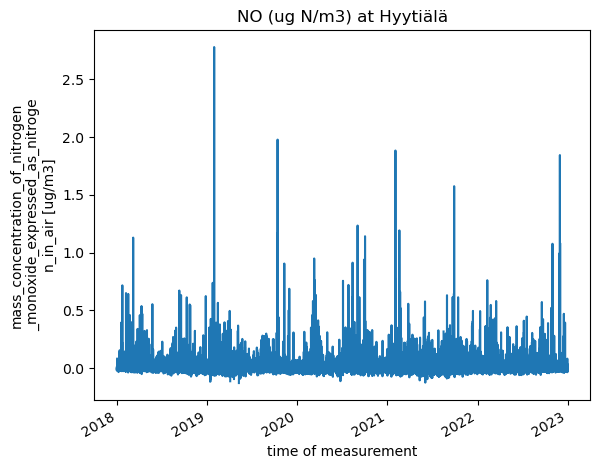

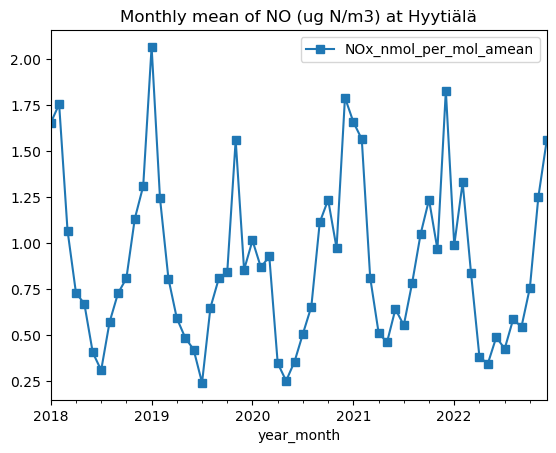

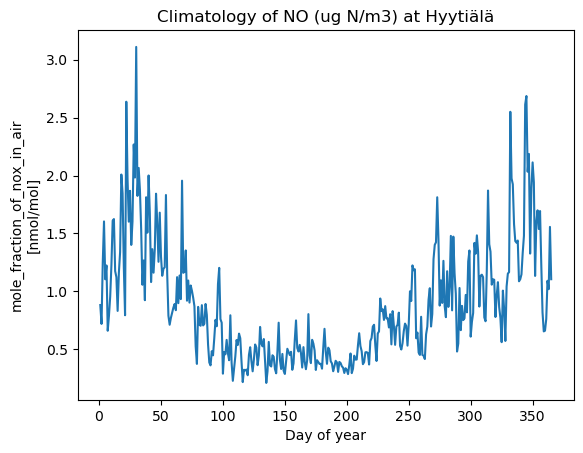

In [5]:
variables = ['NOx_nmol_per_mol_amean', 'NOx_ug_N_per_m3_amean','nitrogen_dioxide_nmol_per_mol_amean', 'nitrogen_dioxide_ug_N_per_m3_amean','nitrogen_monoxide_nmol_per_mol_amean', 'nitrogen_monoxide_ug_N_per_m3_amean']
title = ['NOx (nmol/mol)', 'NOx (ug N/m3)', 'NO2 (nmol/mol)', 'NO2 (ug N/m3)', 'NO (nmol/mol)', 'NO (ug N/m3)']

def year_month(xray_obj):
    """Given an xray object with a 'time' coordinate, return an DataArray
    with values given by the first date of the month in which each time
    falls.
    """
    time = xray_obj.coords['time']
    values = time.to_index().to_period('M').to_timestamp()
    return xr.DataArray(values, [time], name='year_month')


for i in range(len(variables)): 
    ds[variables[i]].plot()
    plt.title('{} at {}'.format(title[i],ds.ebas_station_name))
    plt.show()

    monthly_avg = ds[variables[0]].groupby(year_month(ds[variables[0]])).mean()
    monthly_avg.to_dataframe().plot(style='s-')
    plt.title('Monthly mean of {} at {}'.format(title[i],ds.ebas_station_name))
    plt.show()

    ds[variables[0]].groupby('time.dayofyear').mean().plot()
    plt.title('Climatology of {} at {}'.format(title[i],ds.ebas_station_name))
    plt.xlabel('Day of year')
    plt.show()

    